## 1.1 Loading Data

In [49]:


import pandas
data = pandas.read_csv('preprocessed_data.csv')
data.columns

Index(['school_state', 'teacher_prefix', 'project_grade_category',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay', 'price'],
      dtype='object')

<h2>1.2 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [51]:
# Split the dataset 
# 1) If you want to apply simple cross-validation, split the dataset into 3 parts (ie., train, CV and test sets)
# 2) If you want to apply K-fold CV (or) GridSearch Cross Validation (or) Randomized Search Cross Validation, just split the dataset into 2 parts (ie., train and test sets)
from sklearn.model_selection import train_test_split
y = data['project_is_approved'].values
X = data.drop(['project_is_approved'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.33, stratify = y, random_state = 1)
print(len(X_train),len(X_test))


73196 36052


<h2>1.3 Make Data Model Ready: encoding essay, and project_title</h2>

In [52]:
# Apply Bag of Words (BOW) vectorization on 'Preprocessed_Essay' 
# Apply Bag of Words (BOW) vectorization on 'Preprocessed_Title' (Optional)

from sklearn.feature_extraction.text import CountVectorizer
corpus = data["essay"].values
vectorizer = CountVectorizer(stop_words = 'english', ngram_range=(2,2),max_features= 5000)
vectorizer.fit(corpus)


CountVectorizer(max_features=5000, ngram_range=(2, 2), stop_words='english')

In [53]:
vectorizer_train_bow = vectorizer.transform(X_train['essay'].values)
print(vectorizer_train_bow.shape)
vectorizer_test_bow = vectorizer.transform(X_test['essay'].values)

(73196, 5000)


In [54]:
# Apply TF-IDF vectorization on 'Preprocessed_Essay' 
# Apply TF-IDF vectorization on 'Preprocessed_Title' (Optional)
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vec = TfidfVectorizer(min_df=10,max_features=5000)
tfidf_vec.fit(corpus)
vec_train_tfidf = tfidf_vec.transform(X_train['essay'].values)
vec_test_tfidf = tfidf_vec.transform(X_test['essay'].values)



In [55]:
print(vec_train_tfidf.shape)
print(vec_test_tfidf.shape)

(73196, 5000)
(36052, 5000)


<h2>1.4 Make Data Model Ready: encoding numerical, categorical features</h2>

### Encoding categorical features

In [56]:
# Apply One-Hot Encoding on the categorical features either using OneHotEncoder() (or) CountVectorizer(binary=True)
# Apply Normalization on the numerical features using Normalizer().


vectorizer_state = CountVectorizer()
X_train_state = vectorizer_state.fit_transform(X_train['school_state'].values)


X_test_state = vectorizer_state.fit_transform(X_test['school_state'].values)

print(X_train_state.shape, y_train.shape)
print(X_test_state.shape, y_test.shape)


(73196, 51) (73196,)
(36052, 51) (36052,)


In [57]:
print(X_train.columns)
vectorizer_project_grade_category = CountVectorizer()
X_train_project_grade_category = vectorizer_project_grade_category.fit_transform(X_train['project_grade_category'].values)
X_test_project_grade_category = vectorizer_project_grade_category.fit_transform(X_test['project_grade_category'].values)

print(X_train_project_grade_category.shape, y_train.shape)
print(X_test_project_grade_category.shape, y_test.shape)

Index(['school_state', 'teacher_prefix', 'project_grade_category',
       'teacher_number_of_previously_posted_projects', 'clean_categories',
       'clean_subcategories', 'essay', 'price'],
      dtype='object')
(73196, 4) (73196,)
(36052, 4) (36052,)


In [58]:
vectorizer_teacher_prefix = CountVectorizer()
X_train_teacher_prefix = vectorizer_teacher_prefix.fit_transform(X_train['teacher_prefix'].values)
X_test_teacher_prefix = vectorizer_teacher_prefix.fit_transform(X_test['teacher_prefix'].values)

print(X_train_teacher_prefix.shape, y_train.shape)
print(X_test_teacher_prefix.shape, y_test.shape)

(73196, 5) (73196,)
(36052, 5) (36052,)


In [59]:
vectorizer_clean_categories = CountVectorizer()
X_train_clean_categories = vectorizer_clean_categories.fit_transform(X_train['clean_categories'].values)
X_test_clean_categories = vectorizer_clean_categories.fit_transform(X_test['clean_categories'].values)

print(X_train_clean_categories.shape, y_train.shape)
print(X_test_clean_categories.shape, y_test.shape)

(73196, 9) (73196,)
(36052, 9) (36052,)


In [60]:
vectorizer_clean_subcategories = CountVectorizer()
X_train_clean_subcategories = vectorizer_clean_subcategories.fit_transform(X_train['clean_subcategories'].values)
X_test_clean_subcategories = vectorizer_clean_subcategories.fit_transform(X_test['clean_subcategories'].values)

print(X_train_clean_subcategories.shape, y_train.shape)
print(X_test_clean_subcategories.shape, y_test.shape)

(73196, 30) (73196,)
(36052, 30) (36052,)


### Encoding numerical features

In [61]:
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()
X_train_price = normalizer.fit_transform(X_train['price'].values.reshape(1,-1)) # .reshape to convert everything onto the y axis from x axis
X_test_price = normalizer.fit_transform(X_test['price'].values.reshape(1,-1))
X_train_price = X_train_price.reshape(-1,1)
X_test_price = X_test_price.reshape(-1,1)
print(X_train_price.shape, y_train.shape)
print(X_test_price.shape, y_test.shape)


(73196, 1) (73196,)
(36052, 1) (36052,)


In [62]:
normalizer = Normalizer()
X_train_submission = normalizer.fit_transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1)) # .reshape to convert everything onto the y axis from x axis
X_test_submission = normalizer.fit_transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
X_train_submission = X_train_price.reshape(-1,1)
X_test_submission = X_test_price.reshape(-1,1)
print(X_train_submission.shape, y_train.shape)
print(X_test_submission.shape, y_test.shape)


(73196, 1) (73196,)
(36052, 1) (36052,)


In [63]:
from scipy.sparse import hstack

X_train_set_bow = hstack((vectorizer_train_bow,  X_train_submission, X_train_price, X_train_clean_subcategories, X_train_clean_categories, X_train_teacher_prefix, X_train_project_grade_category, X_train_state))
X_test_set_bow = hstack((vectorizer_test_bow,  X_test_submission, X_test_price, X_test_clean_subcategories, X_test_clean_categories, X_test_teacher_prefix, X_test_project_grade_category, X_test_state))
X_train_set_tfidf = hstack((vec_train_tfidf,  X_train_submission, X_train_price, X_train_clean_subcategories, X_train_clean_categories, X_train_teacher_prefix, X_train_project_grade_category, X_train_state))
X_test_set_tfidf = hstack((vec_test_tfidf,  X_test_submission, X_test_price, X_test_clean_subcategories, X_test_clean_categories, X_test_teacher_prefix, X_test_project_grade_category, X_test_state ))

In [64]:
print(X_train_set_bow.shape, X_test_set_bow.shape)
print(X_train_set_tfidf.shape, X_test_set_tfidf.shape)

(73196, 5101) (36052, 5101)
(73196, 5101) (36052, 5101)


<h2>1.5 Appling NB on different kind of featurization as mentioned in the instructions</h2>

<br>Apply NB on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

#### BOW

In [65]:
# Perform Hyperparameter Tuning.
# Plot the training and the CV AUC scores, for different values of 'alpha', using a 2D line plot
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

params = {'alpha': [0.01, 0.1, 1, 10, 100]}

multinomial_nb_grid = GridSearchCV(MultinomialNB(), param_grid = params, n_jobs = -1, cv = 10, verbose = 5, return_train_score=True,scoring = 'roc_auc')
multinomial_nb_grid.fit(X_train_set_bow,y_train)

train_auc = multinomial_nb_grid.cv_results_['mean_train_score']
cv_auc = multinomial_nb_grid.cv_results_['mean_test_score']









Fitting 10 folds for each of 5 candidates, totalling 50 fits


In [66]:
# Obtain the optimal value for 'alpha' and using the obtained optimal 'alpha' value, fit a multinomial naive bayes model, on the train data,
# Note: If you have split the datase into 3 parts (ie., train, cv and test sets) in the beginning, then the training datafor this final model would be (train set + cv set)
# Make class label and probability predictions on the train and test data.


print('Train Accuracy : %.3f'%multinomial_nb_grid.best_estimator_.score(X_train_set_bow,y_train))
print('Test Accuracy : %.3f'%multinomial_nb_grid.best_estimator_.score(X_test_set_bow, y_test))
print('Best Accuracy Through Grid Search : %.3f'%multinomial_nb_grid.best_score_)
print('Best Parameters : ',multinomial_nb_grid.best_params_)


Train Accuracy : 0.771
Test Accuracy : 0.752
Best Accuracy Through Grid Search : 0.664
Best Parameters :  {'alpha': 0.01}


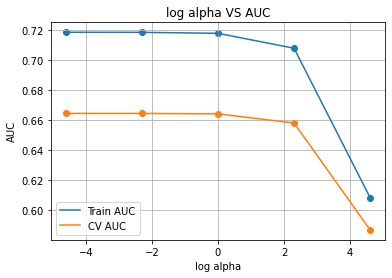

In [67]:
import numpy as np
import matplotlib.pyplot as plt 

log_param = list(map(np.log, params["alpha"]))



plt.plot(log_param,train_auc, label = 'Train AUC')
plt.plot(log_param,cv_auc, label = "CV AUC")
plt.scatter(log_param, train_auc)
plt.scatter(log_param, cv_auc)
plt.legend()
plt.title("log alpha VS AUC")
plt.xlabel("log alpha")
plt.ylabel("AUC")
plt.grid()




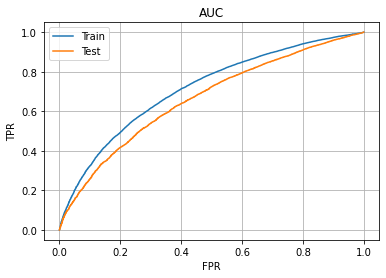

In [68]:
# Plot the ROC-AUC curves using the probability predictions made on train and test data.
from sklearn.metrics import roc_curve, auc

model_bow = MultinomialNB(alpha = 0.01 )
model_bow.fit(X_train_set_bow, y_train)
y_train_prob = multinomial_nb_grid.predict_proba(X_train_set_bow)[:, 1]
y_test_prob = multinomial_nb_grid.predict_proba(X_test_set_bow)[:, 1]

train_fpr, train_tpr, train_thresholds = roc_curve(y_train,y_train_prob)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_prob)
auc_train_bow = auc(train_fpr, train_tpr)
auc_test_bow = auc(test_fpr, test_tpr)
plt.plot(train_fpr, train_tpr, label = "Train")
plt.plot(test_fpr,test_tpr, label = "Test")
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('AUC')
plt.grid()


In [69]:
# Pick the best threshold among the probability estimates, such that it has to yield maximum value for TPR*(1-FPR)
# Plot the confusion matrices(each for train and test data) afer encoding the predicted class labels, on the basis of the best threshod probability estimate.
def best_threshold(threshold, fpr, tpr):
    return(threshold[np.argmax(tpr*(1-fpr))])
def best_predictions(proba, threshold):
    pred = []
    for i in proba:
        if i> threshold:
            pred.append(1)
        else:
            pred.append(0)
    return pred



<AxesSubplot:>

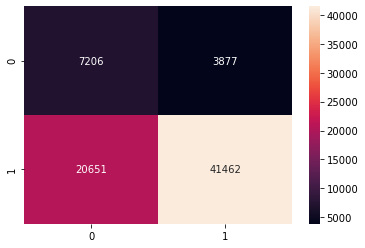

In [70]:
import seaborn as sns
from sklearn import metrics
threshold = best_threshold(train_thresholds, train_fpr, train_tpr)
cm = metrics.confusion_matrix(y_train, best_predictions(y_train_prob, threshold))

sns.heatmap(cm,annot = True, fmt = 'd')


<AxesSubplot:>

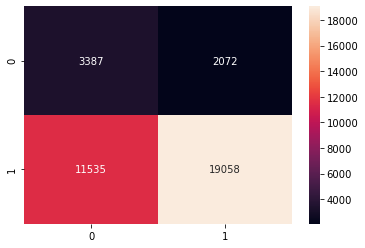

In [71]:
threshold = best_threshold(test_thresholds, test_fpr, test_tpr)
cm = metrics.confusion_matrix(y_test, best_predictions(y_test_prob, threshold))
sns.heatmap(cm, annot= True, fmt = 'd')


#### TFIDF

In [72]:
# Perform Hyperparameter Tuning.
# Plot the training and the CV AUC scores, for different values of 'alpha', using a 2D line plot

multinomial_nb_grid_tfidf = GridSearchCV(MultinomialNB(), param_grid = params, n_jobs = -1, cv = 10, verbose = 5, return_train_score=True,scoring = 'roc_auc')
multinomial_nb_grid_tfidf.fit(X_train_set_tfidf,y_train)

train_auc_tfidf = multinomial_nb_grid_tfidf.cv_results_['mean_train_score']
cv_auc_tfidf = multinomial_nb_grid_tfidf.cv_results_['mean_test_score']


Fitting 10 folds for each of 5 candidates, totalling 50 fits


In [73]:
# Obtain the optimal value for 'alpha' and using the obtained optimal 'alpha' value, fit a multinomial naive bayes model, on the train data,
# Note: If you have split the datase into 3 parts (ie., train, cv and test sets) in the beginning, then the training datafor this final model would be (train set + cv set)
# Make class label and probability predictions on the train and test data.
print('Train Accuracy : %.3f'%multinomial_nb_grid_tfidf.best_estimator_.score(X_train_set_bow,y_train))
print('Test Accuracy : %.3f'%multinomial_nb_grid_tfidf.best_estimator_.score(X_test_set_bow, y_test))
print('Best Accuracy Through Grid Search : %.3f'%multinomial_nb_grid_tfidf.best_score_)
print('Best Parameters : ',multinomial_nb_grid_tfidf.best_params_)



Train Accuracy : 0.837
Test Accuracy : 0.834
Best Accuracy Through Grid Search : 0.673
Best Parameters :  {'alpha': 0.01}


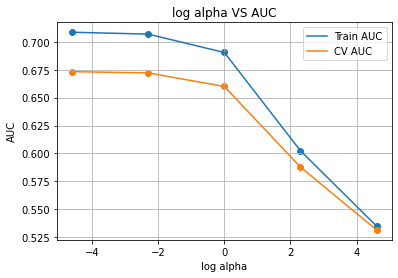

In [74]:
log_param = list(map(np.log, params["alpha"]))



plt.plot(log_param,train_auc_tfidf, label = 'Train AUC')
plt.plot(log_param,cv_auc_tfidf, label = "CV AUC")
plt.scatter(log_param, train_auc_tfidf)
plt.scatter(log_param, cv_auc_tfidf)
plt.legend()
plt.title("log alpha VS AUC")
plt.xlabel("log alpha")
plt.ylabel("AUC")
plt.grid()


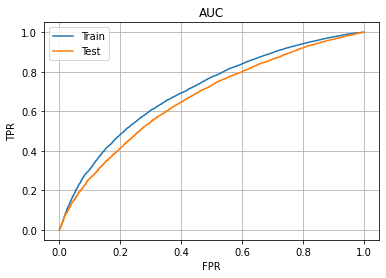

In [75]:
# Plot the ROC-AUC curves using the probability predictions made on train and test data.
model_tfidf = MultinomialNB(alpha = 100 )
model_tfidf.fit(X_train_set_tfidf, y_train)
y_train_prob = multinomial_nb_grid_tfidf.predict_proba(X_train_set_tfidf)[:, 1]
y_test_prob = multinomial_nb_grid_tfidf.predict_proba(X_test_set_tfidf)[:, 1]

train_fpr, train_tpr, train_thresholds = roc_curve(y_train,y_train_prob)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_prob)
auc_train_tfidf = auc(train_fpr,train_tpr)
auc_test_tfidf = auc(test_fpr, test_tpr)
plt.plot(train_fpr, train_tpr, label = "Train")
plt.plot(test_fpr,test_tpr, label = "Test")
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('AUC')
plt.grid()


<AxesSubplot:>

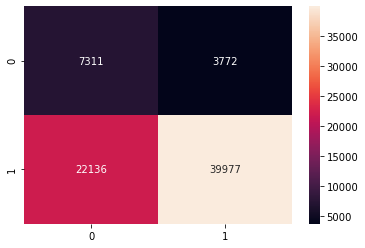

In [76]:
# Pick the best threshold among the probability estimates, such that it has to yield maximum value for TPR*(1-FPR)
# Plot the confusion matrices(each for train and test data) afer encoding the predicted class labels, on the basis of the best threshod probability estimate.
threshold = best_threshold(train_thresholds, train_fpr, train_tpr)
cm = metrics.confusion_matrix(y_train, best_predictions(y_train_prob, threshold))

sns.heatmap(cm,annot = True, fmt = 'd')


<AxesSubplot:>

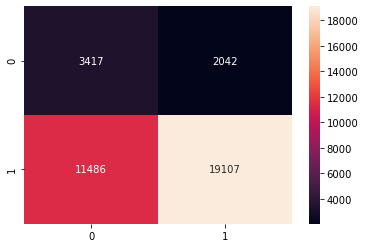

In [77]:
threshold = best_threshold(test_thresholds, test_fpr, test_tpr)
cm = metrics.confusion_matrix(y_test, best_predictions(y_test_prob, threshold))
sns.heatmap(cm, annot= True, fmt = 'd')


In [78]:
# Either from set 1 (or) set 2, print the names of the top 20 features associated with the positive and negative classes each. (You have to print the names of the features, but not the indexes)
# reffered to https://stackoverflow.com/questions/50526898/how-to-get-feature-importance-in-naive-bayes
features = []
for feature in vectorizer.get_feature_names():
    features.append(feature)
for feature in vectorizer_clean_subcategories.get_feature_names():
    features.append(feature)
for feature in vectorizer_clean_categories.get_feature_names():
    features.append(feature)
for feature in vectorizer_teacher_prefix.get_feature_names():
    features.append(feature)
for feature in vectorizer_project_grade_category.get_feature_names():
    features.append(feature)
for feature in vectorizer_state.get_feature_names():
    features.append(feature)
features.append("price")
features.append('teacher_number_of_previously_posted_projects')
neg_class_prob_sorted = model_bow.feature_log_prob_[0, :].argsort()[::-1]
pos_class_prob_sorted = model_bow.feature_log_prob_[1, :].argsort()[::-1]

print(np.take(features, neg_class_prob_sorted[: 20]))
print(np.take(features, pos_class_prob_sorted[: 20]))


['teacher' 'music_arts' 'al' 'specialneeds' 'grades_3_5' 'grades_9_12'
 'students come' 'mathematics' 'nutritioneducation' 'help students'
 'students need' 'students able' 'low income' 'music' 'students learn'
 'grades_prek_2' 'title school' 'allow students' 'free reduced'
 'come school']
['teacher' 'music_arts' 'al' 'specialneeds' 'grades_3_5' 'grades_9_12'
 'mathematics' 'students come' 'nutritioneducation' 'help students'
 'students need' 'students able' 'music' 'allow students' 'low income'
 'students love' 'title school' 'free reduced' 'students use'
 'grades_prek_2']


# Summary




In [80]:

data_tab = [["BOW","Multinomial Naive Bayes", 0.01, auc_test_bow],["TFIDF","Multinomial Naive Bayes", 100, auc_test_tfidf]]
table = pandas.DataFrame(data_tab, columns = ['Vectorizer',' Model', "Alpha", "Test AUC score"])
table

,Vectorizer,Model,Alpha,Test AUC score
0,BOW,Multinomial Naive Bayes,0.01,0.662626
1,TFIDF,Multinomial Naive Bayes,100.00,0.668030


## References
https://stackoverflow.com/questions/50526898/how-to-get-feature-importance-in-naive-bayes

https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python

https://coderzcolumn.com/tutorials/machine-learning/scikit-learn-sklearn-naive-bayes

https://stackoverflow.com/questions/47957151/error-expected-2d-array-got-1d-array-instead-using-onehotencoder

https://www.mygreatlearning.com/blog/bag-of-words/